In [1]:
##importing Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor


In [2]:
###loading train data set
housing_train=pd.read_csv('msc_training_dataset.csv')
housing_train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [3]:
###loading test data set
housing_test=pd.read_csv('msc_testing_dataset.csv')
housing_test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [4]:
###Exploratory Data Analysis
#counting missing observations
housing_train.isnull().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

In [5]:
##describing data
housing_train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [6]:
###correlation properties
housing_train2=housing_train.corr()
round(housing_train2, 2)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
room,1.00,0.02,0.02,0.01,0.00,0.00,-0.02,-0.01,0.01,-0.02,0.00,0.65
bathroom,0.02,1.00,-0.01,0.01,0.01,-0.01,0.04,-0.02,0.00,-0.02,-0.03,0.06
kitchen,0.02,-0.01,1.00,-0.02,-0.00,0.00,-0.02,0.00,-0.01,0.02,0.00,0.12
french_door,0.01,0.01,-0.02,1.00,0.01,-0.01,0.01,-0.01,0.02,-0.03,-0.02,0.09
backyard,0.00,0.01,-0.00,0.01,1.00,-0.00,0.00,-0.01,0.01,-0.01,-0.02,0.13
furnished,0.00,-0.01,0.00,-0.01,-0.00,1.00,0.03,-0.02,0.01,-0.01,0.02,0.45
green_paint,-0.02,0.04,-0.02,0.01,0.00,0.03,1.00,-0.01,-0.01,-0.01,-0.02,0.08
solar_power,-0.01,-0.02,0.00,-0.01,-0.01,-0.02,-0.01,1.00,-0.02,-0.00,-0.01,0.32
woodfloor,0.01,0.00,-0.01,0.02,0.01,0.01,-0.01,-0.02,1.00,0.00,0.01,0.43
qlm_security,-0.02,-0.02,0.02,-0.03,-0.01,-0.01,-0.01,-0.00,0.00,1.00,0.03,0.08


<Axes: >

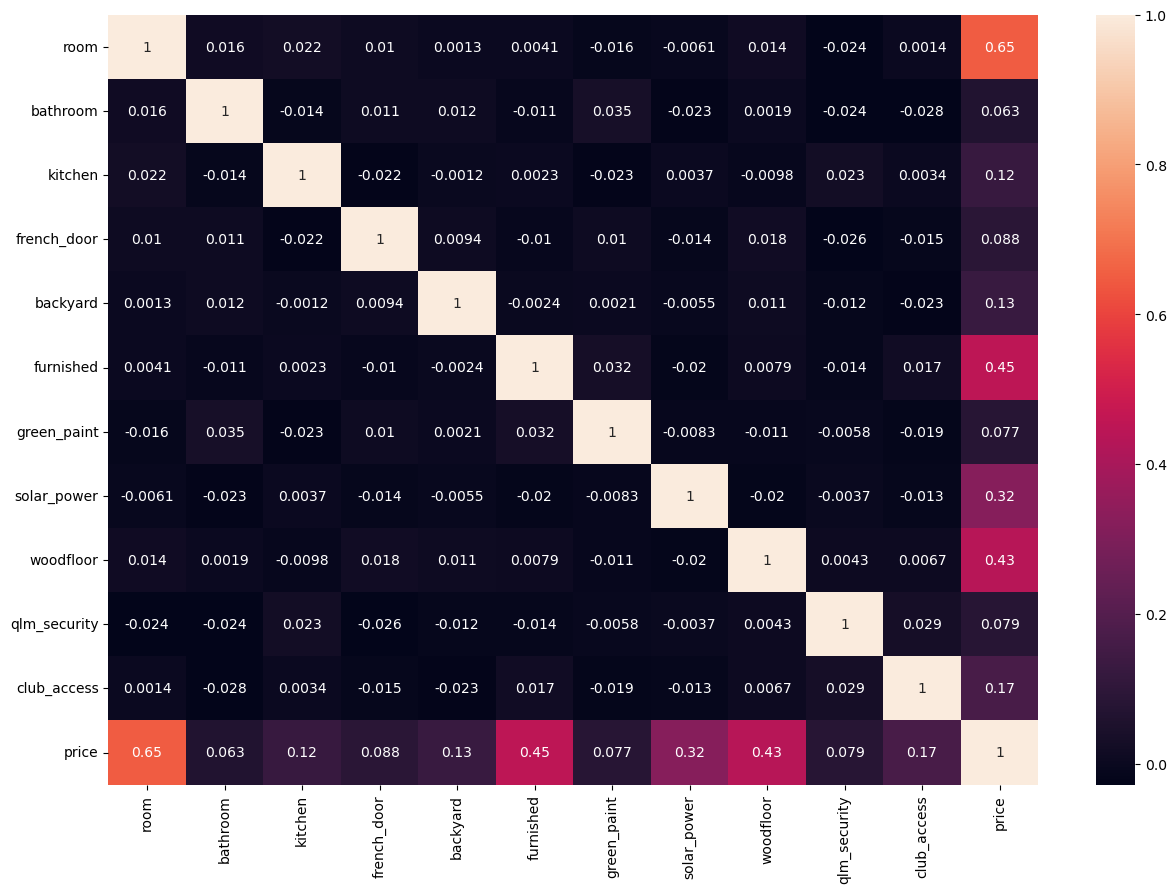

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(housing_train2, annot=True)

In [8]:
#input and output features for train set
X_train=housing_train.drop(['price'], axis = 1)
y_train=housing_train['price']
features = X_train.columns

In [9]:
X_train.shape

(3000, 11)

In [10]:
print(X_train[:10])

   room  bathroom  kitchen  french_door  backyard  furnished  green_paint  \
0     3         1        2            1         1          0            1   
1     5         2        2            2         1          0            0   
2     5         2        2            2         1          0            0   
3     1         2        1            2         0          0            0   
4     2         1        2            3         1          1            0   
5     5         1        2            1         0          0            1   
6     3         1        1            3         1          0            0   
7     1         1        1            1         0          0            0   
8     5         1        1            2         0          0            0   
9     3         1        1            2         0          0            0   

   solar_power  woodfloor  qlm_security  club_access  
0            0          0             1            1  
1            0          0             1   

In [11]:
print(y_train[:10])

0    6835
1    9005
2    9005
3    5105
4    9105
5    8995
6    6805
7    4935
8    9895
9    6365
Name: price, dtype: int64


In [12]:
#input and output features prep for test set
X_test=housing_test.drop(['price'], axis = 1)
y_test=housing_test['price']

# Question 1

feature importance

In [14]:
#creating and fitting the model
DTR = DecisionTreeRegressor()
DTR= DTR.fit(X_train, y_train)
DTR

DecisionTreeRegressor()

In [15]:
print(f"regressor train accuracy is: { DTR.score(X_train, y_train):.3f}")
print(f"regressor test accuracy is: { DTR.score(X_test, y_test):.3f}")

regressor train accuracy is: 1.000
regressor test accuracy is: 0.977


In [16]:
#printing the features importance
feature_importance = DTR.feature_importances_
feature_importance

array([0.42670578, 0.00465158, 0.01113663, 0.00849631, 0.01517127,
       0.20082385, 0.00702513, 0.11471544, 0.17567573, 0.00889844,
       0.02669984])

<Axes: >

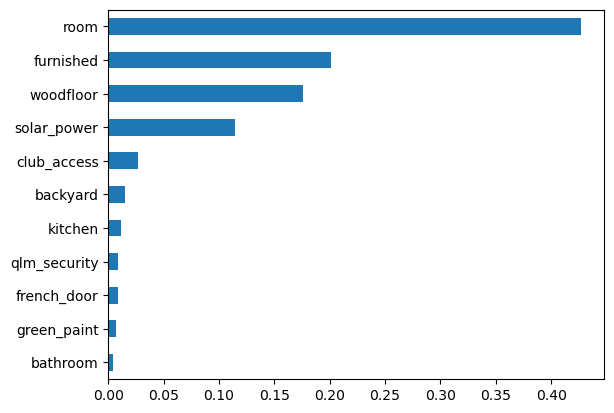

In [17]:
#plotting the result
FI = pd.Series(DTR.feature_importances_, index = features).sort_values(ascending = True)
FI.plot(kind = 'barh')

# Question 2

predicting house prices

In [18]:
##creating and fitting the model
regressor = DecisionTreeRegressor(random_state = 0)
regressor = regressor.fit(X_train, y_train)
regressor

DecisionTreeRegressor(random_state=0)

In [19]:
##predicting the model result on the test set
y_pred = regressor.predict(X_test)

In [20]:
y_pred

array([ 5355.,  7645., 11305.,  8845., 11165., 11615., 11735.,  7135.,
        7875.,  5895.,  8855.,  8665.,  6935., 11305.,  7205.,  9405.,
        9075., 12745., 10185.,  6795.,  8845.,  7475.,  7075.,  4075.,
       10335.,  7295.,  7705.,  9325.,  6825.,  9195.,  6645., 10065.,
       10485.,  8195.,  7565., 10355.,  8605., 11115.,  9525., 13125.,
        6735.,  5125., 10065.,  9325., 11715.,  6205.,  4335., 11475.,
        9265.,  5605., 11455., 10875.,  4665.,  8105., 13615.,  9835.,
        5945.,  8735., 10355.,  7835.,  7835., 13695.,  7635.,  8435.,
       12625.,  7965., 11235., 10555., 10095.,  5535.,  8235., 12095.,
        3975.,  6235.,  9655.,  8705.,  7005., 11695., 10555., 10155.,
        8785.,  7855., 12235.,  8075., 11805.,  6245.,  8775.,  8275.,
        6925.,  8545.,  6965., 12465., 11665.,  7975.,  6645., 11035.,
       11235.,  8975.,  9595.,  7005.,  6995.,  8995.,  4575.,  9915.,
        5235.,  5515., 10645.,  9705.,  9105., 11955.,  7625.,  6105.,
      

In [21]:
print(f"regressor train accuracy is: { regressor.score(X_train, y_train):.3f}")
print(f"regressor test accuracy is: { regressor.score(X_test, y_test):.3f}")

regressor train accuracy is: 1.000
regressor test accuracy is: 0.978


In [22]:
#comparing real and pred values
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

In [23]:
df.to_csv(r'C:\Users\User\Downloads\Assignment.csv', header  = True)
print(df)

     Real Values  Predicted Values
0           5068            5355.0
1           7658            7645.0
2          11318           11305.0
3           8858            8845.0
4          11178           11165.0
..           ...               ...
994        10088            9775.0
995         9788            9775.0
996         9388            9315.0
997         8528            8515.0
998         6118            6585.0

[999 rows x 2 columns]


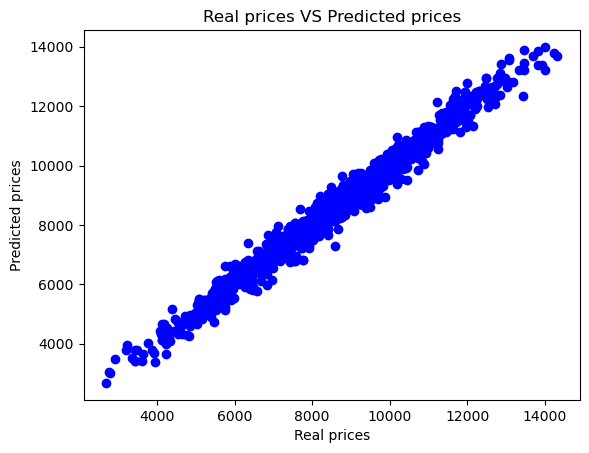

In [24]:
#visualizing the regression
plt.scatter(y_test, y_pred, color = 'blue')
plt.title('Real prices VS Predicted prices')
plt.xlabel('Real prices')
plt.ylabel('Predicted prices')
plt.show()